> #### <b style="color: #58a491">컨볼루션</b>
> - filters: 출력채널 수(필터 수)
> - kernel_size: 필터 크기
> - stride: 필터 이동 수
> - padding: valid, same
> - activation: 비선형성 가능

> **filter = kernel * n => (8 * 8) * 5**  
> 224 * 224 * 3 => (8 * 8 * 3) * 5 => 219 * 219 * 5 (219 맞나..?)

In [6]:
import tensorflow as tf
from tools.dataset.five_flowers import IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS, CLASS_NAMES, get_datasets

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    tf.keras.layers.Conv2D(256, (5, 5), strides=1,  activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(384, (3, 3), strides=1, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(384, (3, 3), strides=1, activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax')
])

In [11]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [12]:
train_dataset, validation_dataset = get_datasets()

In [13]:
model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10


2024-01-25 10:49:21.269872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    193/Unknown - 31s 143ms/step - loss: 1.6988 - accuracy: 0.2050

2024-01-25 10:49:51.972181: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 18072022922259812577
2024-01-25 10:49:51.972193: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 4923897260437924605
2024-01-25 10:49:51.972198: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 18155849843616000979
2024-01-25 10:49:51.972577: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 4010731038556612836
2024-01-25 10:49:51.972587: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 8275479923387059246
2024-01-25 10:49:51.972592: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 15852470785950641052
2024-01-25 10:49:51.972601: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv 

193/193 [==============================] - 34s 160ms/step - loss: 1.6988 - accuracy: 0.2050 - val_loss: 1.6162 - val_accuracy: 0.2075
Epoch 2/10
  1/193 [..............................] - ETA: 29s - loss: 1.5409 - accuracy: 0.4000

2024-01-25 10:49:55.223093: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 10870927887074889991
2024-01-25 10:49:55.223106: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 12171979885843804494
2024-01-25 10:49:55.223113: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 154442651349317342
2024-01-25 10:49:55.223116: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 13991202170650556376


193/193 [==============================] - 30s 154ms/step - loss: 1.6193 - accuracy: 0.2081 - val_loss: 1.6166 - val_accuracy: 0.2075
Epoch 3/10
193/193 [==============================] - 29s 152ms/step - loss: 1.6199 - accuracy: 0.2066 - val_loss: 1.6180 - val_accuracy: 0.2075
Epoch 4/10
193/193 [==============================] - 29s 153ms/step - loss: 1.6205 - accuracy: 0.2076 - val_loss: 1.6188 - val_accuracy: 0.2075
Epoch 5/10
193/193 [==============================] - 29s 152ms/step - loss: 1.6210 - accuracy: 0.2102 - val_loss: 1.6193 - val_accuracy: 0.2075
Epoch 6/10
193/193 [==============================] - 30s 156ms/step - loss: 1.6213 - accuracy: 0.2097 - val_loss: 1.6196 - val_accuracy: 0.2075
Epoch 7/10
193/193 [==============================] - 29s 152ms/step - loss: 1.6216 - accuracy: 0.2097 - val_loss: 1.6198 - val_accuracy: 0.2075
Epoch 8/10
193/193 [==============================] - 30s 153ms/step - loss: 1.6219 - accuracy: 0.2081 - val_loss: 1.6200 - val_accuracy: 0.2

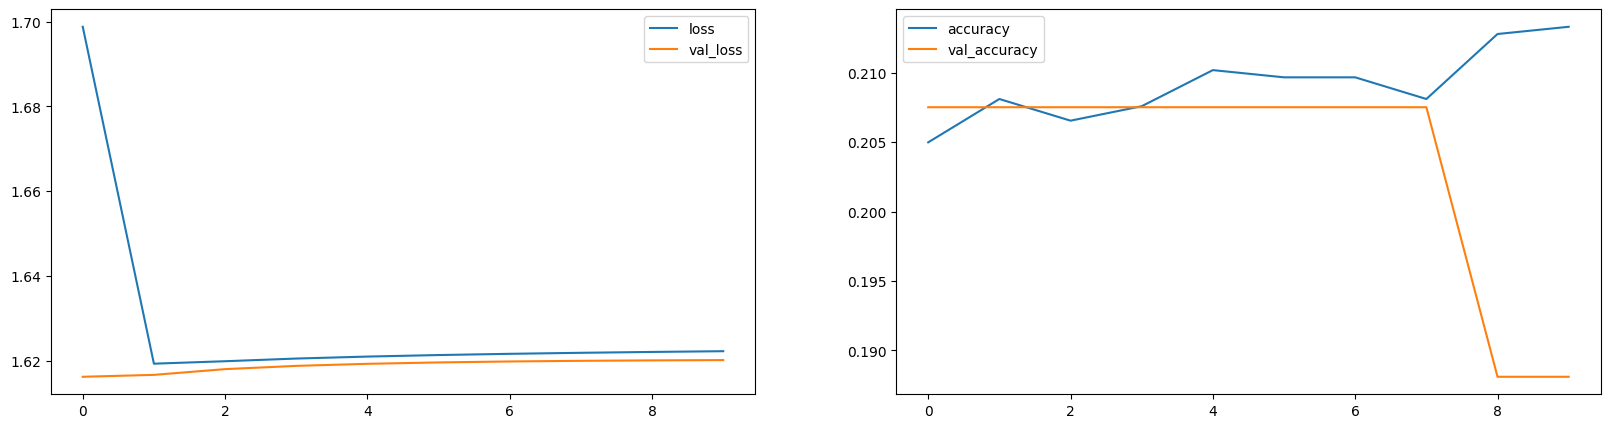

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_history = pd.DataFrame(model.history.history)
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
df_history[['loss', 'val_loss']].plot(ax=axes[0])
df_history[['accuracy', 'val_accuracy']].plot(ax=axes[1])
plt.show()

In [15]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=[IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS]),
    tf.keras.layers.Conv2D(filters=96, kernel_size=11, strides=4, activation='relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=384, kernel_size=3, activation= 'relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=384, kernel_size=3, activation= 'relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense (4096, activation='relu'),
    tf.keras.layers.Dense(len (CLASS_NAMES), activation= 'softmax')
])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [16]:
model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10


2024-01-25 11:18:56.866387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    193/Unknown - 28s 141ms/step - loss: 1.6978 - accuracy: 0.2076

2024-01-25 11:19:24.396119: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 16735036533824287758
2024-01-25 11:19:24.396135: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 18072022922259812577
2024-01-25 11:19:24.396139: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 4923897260437924605
2024-01-25 11:19:24.396762: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 683670436620322644
2024-01-25 11:19:24.396772: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 4010731038556612836
2024-01-25 11:19:24.396777: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 8275479923387059246
2024-01-25 11:19:24.396786: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv it

193/193 [==============================] - 31s 156ms/step - loss: 1.6978 - accuracy: 0.2076 - val_loss: 1.6242 - val_accuracy: 0.1881
Epoch 2/10
  1/193 [..............................] - ETA: 32s - loss: 1.5568 - accuracy: 0.2000

2024-01-25 11:19:27.325943: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 10870927887074889991
2024-01-25 11:19:27.325960: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 12171979885843804494
2024-01-25 11:19:27.325964: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 42356004297669140
2024-01-25 11:19:27.325971: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 154442651349317342


193/193 [==============================] - 30s 157ms/step - loss: 1.6245 - accuracy: 0.2107 - val_loss: 1.6243 - val_accuracy: 0.1881
Epoch 3/10
193/193 [==============================] - 30s 154ms/step - loss: 1.6247 - accuracy: 0.2118 - val_loss: 1.6247 - val_accuracy: 0.1881
Epoch 4/10
193/193 [==============================] - 30s 155ms/step - loss: 1.6251 - accuracy: 0.2123 - val_loss: 1.6250 - val_accuracy: 0.1881
Epoch 5/10
193/193 [==============================] - 30s 154ms/step - loss: 1.6255 - accuracy: 0.2112 - val_loss: 1.6252 - val_accuracy: 0.1881
Epoch 6/10
193/193 [==============================] - 30s 155ms/step - loss: 1.6258 - accuracy: 0.2123 - val_loss: 1.6253 - val_accuracy: 0.1881
Epoch 7/10
193/193 [==============================] - 30s 156ms/step - loss: 1.6260 - accuracy: 0.2112 - val_loss: 1.6253 - val_accuracy: 0.1881
Epoch 8/10
193/193 [==============================] - 30s 153ms/step - loss: 1.6262 - accuracy: 0.2112 - val_loss: 1.6254 - val_accuracy: 0.1

> #### <b style="color: #58a491">깊이의 연관성</b>
> - 표현력: 단일층 여러개로 비선형성이 증가
> - 일반화: 단일층의 복잡도는 과적합을 발생 -> 여러층은 입력의 의미론적 분해
> - 인식장: 큰 이미지 개체도 여러층을 사용하면 작은 필터로 볼수 있게 된다. 뭔소리야

In [19]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=[IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS]),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense (4096, activation='relu'),
    tf.keras.layers.Dense(len(CLASS_NAMES), activation= 'softmax')
])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [20]:
model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10


2024-01-25 11:27:36.455226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    193/Unknown - 161s 826ms/step - loss: 1.6371 - accuracy: 0.2086

2024-01-25 11:30:17.084012: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 9184445751578525458
2024-01-25 11:30:17.084662: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 7209507192515987122
2024-01-25 11:30:17.084668: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 12167056720529288780
2024-01-25 11:30:17.084673: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 18434074119888572282
2024-01-25 11:30:17.205372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


193/193 [==============================] - 177s 907ms/step - loss: 1.6371 - accuracy: 0.2086 - val_loss: 1.6220 - val_accuracy: 0.1881
Epoch 2/10


2024-01-25 11:30:32.600594: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 18426006849868700357
2024-01-25 11:30:32.600606: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 8295183830832980783
2024-01-25 11:30:32.600613: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 1329562739589405542
2024-01-25 11:30:32.600617: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 2629065036430255992


193/193 [==============================] - 172s 892ms/step - loss: 1.6272 - accuracy: 0.2128 - val_loss: 1.6238 - val_accuracy: 0.1881
Epoch 3/10
193/193 [==============================] - 173s 896ms/step - loss: 1.6268 - accuracy: 0.2133 - val_loss: 1.6235 - val_accuracy: 0.1881
Epoch 4/10
193/193 [==============================] - 173s 896ms/step - loss: 1.6273 - accuracy: 0.2123 - val_loss: 1.6246 - val_accuracy: 0.1881
Epoch 5/10
193/193 [==============================] - 204s 1s/step - loss: 1.6271 - accuracy: 0.2118 - val_loss: 1.6245 - val_accuracy: 0.1881
Epoch 6/10
193/193 [==============================] - 173s 898ms/step - loss: 1.6270 - accuracy: 0.2118 - val_loss: 1.6244 - val_accuracy: 0.1881
Epoch 7/10
193/193 [==============================] - 173s 899ms/step - loss: 1.6269 - accuracy: 0.2118 - val_loss: 1.6244 - val_accuracy: 0.1881
Epoch 8/10
193/193 [==============================] - 174s 902ms/step - loss: 1.6269 - accuracy: 0.2118 - val_loss: 1.6244 - val_accuracy: